<a href="https://colab.research.google.com/github/matsunori39/deep-learning-from-scratch-4/blob/main/deep_learning_from_scratch_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/oreilly-japan/deep-learning-from-scratch-4

In [1]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch-4

Cloning into 'deep-learning-from-scratch-4'...
remote: Enumerating objects: 405, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 405 (delta 10), reused 7 (delta 7), pack-reused 391
Receiving objects: 100% (405/405), 866.33 KiB | 10.56 MiB/s, done.
Resolving deltas: 100% (234/234), done.


# Chapter 1 Bandit problem

## 1.3 Bandit Algorithm

### 1.3.2 Implementation to find the average

In [2]:
import numpy as np

np.random.seed(0)
rewards = []

for n in range(1, 11):
  reward = np.random.rand()
  rewards.append(reward)
  Q = sum(rewards) / n
  print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


In [3]:
Q = 0

for n in range(1, 11):
  reward = np.random.rand()
  Q = Q + (reward - Q) / n
  # Q += (reward - Q) / n
  print(Q)

0.7917250380826646
0.6603099789177845
0.6295548396431672
0.7035652893055406
0.5770594430840099
0.49540441918693173
0.4275207017945595
0.4781580947637318
0.5114912787844116
0.5473433657306523


## 1.4 Bandit Algorithm Implementation

### 1.4.1 Slot machine implementation

In [4]:
import numpy as np

class Bandit:
  def __init__(self, arms=10):
      self.rates = np.random.rand(arms)
  
  def play(self, arm):
    rate = self.rates[arm]
    if rate > np.random.rand():
      return 1
    else:
      return 0

In [5]:
bandit = Bandit()

for i in range(3):
  print(bandit.play(0))

1
1
1


### 1.4.2 Agent Implementation


In [6]:
bandit = Bandit()
Q = 0

for n in range(1, 11):
  # Play the 0th slot machine
  reward = bandit.play(0)
  Q += (reward - Q) / n
  print(Q)

1.0
0.5
0.33333333333333337
0.5
0.6
0.6666666666666666
0.7142857142857143
0.625
0.6666666666666666
0.6


In [7]:
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
  action = np.random.randint(0, 10)
  reward = bandit.play(action)

  ns[action] += 1
  Qs[action] += (reward - Qs[action]) / ns[action]
  print(Qs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


In [8]:
class Agent:
  def __init__(self, epsilon, action_size=10):
      self.epsilon = epsilon
      self.Qs = np.zeros(action_size)
      self.ns = np.zeros(action_size)
  
  def update(self, action, reward):
    self.ns[action] += 1
    self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]
  
  def get_action(self):
    if np.random.rand() < self.epsilon:
      return np.random.randint(0, len(self.Qs))
    return np.argmax(self.Qs)

### 1.4.3 Let's run

892


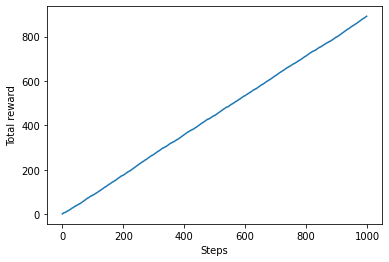

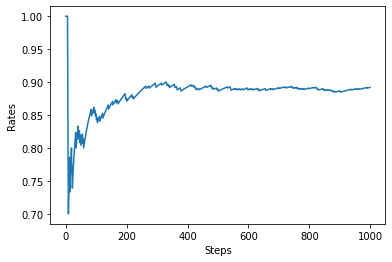

In [9]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
  # (1) Choose an action
  action = agent.get_action()
  # (2) Get rewarded for actually playing
  reward = bandit.play(action)
  # (3) Learning from Behavior and Rewards
  agent.update(action, reward)
  total_reward += reward

  total_rewards.append(total_reward)
  rates.append(total_reward / (step+1))

print(total_reward)

# Drawing Graphs(1)
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# Drawing Graphs(2)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

### 1.4.4 Average nature of the algorithm

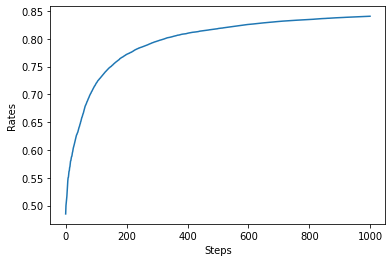

In [10]:
from math import e
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
  bandit = Bandit()
  agent = Agent(epsilon)
  total_reward = 0
  rates = []

  for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward
    rates.append(total_reward / (step+1))
  
  # (1) Record the results of the reward
  all_rates[run] = rates

# (2) Find the average value at each step
avg_rates = np.average(all_rates, axis=0)

# (3) Drawing Graphs
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

## 1.5 nonstationary problem

In [11]:
class NonStatBandit:
  def __init__(self, arms=10):
    self.arms = arms
    self.rates = np.random.rand(arms)

    def play(self, arm):
      rate = self.rates[arm]
      # Adding Noise
      self.rates += 0.1 * np.random.randn(self,arms)
      if rate > np.random.rand():
        return 1
      else:
        return 0

### 1.5.2 Solving non-stationary problems

In [12]:
class AlphaAgent:
  def __init__(self, epsilon, alpha, actions=10):
      self.epsilon = epsilon
      self.Qs = np.zeros(actions)
      self.alpha = alpha
  
  def update(self, action, reward):
    self.Qs[action] += (reward - self.Qs[action]) * self.alpha
  
  def get_action(self):
    if np.random.rand() < self.epsilon:
      return np.random.randint(0, len(self.Qs))
    return np.argmax(self.Qs)

# Chapter 4 Dynamic Programming

## 4.2 To the larger issue

### 4.2.1 Implementation of GridWorld class

In [13]:
%pwd

'/content'

In [14]:
%ls

deep-learning-from-scratch-4/  sample_data/


In [15]:
%cd /content/deep-learning-from-scratch-4

/content/deep-learning-from-scratch-4


In [54]:
import numpy as np
import common.gridworld_render as render_helper

class GridWorld:
  def __init__(self):
    self.action_space = [0, 1, 2, 3]
    self.action_meaning = {
        0: "UP",
        1: "DOWN",
        2: "LEFT",
        3: "RIGHT",
    }

    self.reward_map = np.array(
        [[0, 0, 0, 1.0],
         [0, None, 0, -1.0],
         [0, 0, 0, 0]]
    )
    self.goal_state = (0, 3)
    self.wall_state = (1, 1)
    self.start_state = (2, 0)
    self.agent_state = self.start_state

  @property
  def height(self):
    return len(self.reward_map)

  @property
  def width(self):
    return len(self.reward_map[0])

  @property
  def shape(self):
    return self.reward_map.shape
  
  def actions(self):
    return self.action_space  # [0, 1, 2, 3]
  
  def states(self):
    for h in range(self.height):
      for w in range(self.width):
        yield (h, w)
  
  def next_state(self, state, action):
    # (1) Calculate the destination location
    action_move_map = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    move = action_move_map[action]
    next_state = (state[0] + move[0], state[1] + move[1])
    ny, nx = next_state

    # (2) Is the destination outside the GridWorld frame or is the destination a wall?
    if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height:
      next_state = state
    elif next_state == self.wall_state:
      next_state = state
    
    return next_state

  def reward(self, state, action, next_state):
    return self.reward_map[next_state]
  
  def reset(self):
    self.agent_state = self.start_state
    return self.agent_state
  
  def step(self, action):
    state = self.agent_state
    next_state = self.next_state(state, action)
    reward = self.reward(state, action, next_state)
    done = (next_state == self.goal_state)

    self.agent_state = next_state
    return next_state, reward, done
  
  def render_v(self, v=None, policy=None, print_value=True):
    renderer = render_helper.Renderer(self.reward_map, self.goal_state,
                                      self.wall_state)
    renderer.render_v(v, policy, print_value)

  def render_q(self, q=None, print_value=True):
    renderer = render_helper.Renderer(self.reward_map, self.goal_state,
                                      self.wall_state)
    renderer.render_q(q, print_value)

In [17]:
env = GridWorld()

print(env.height)
print(env.width)
print(env.shape)

3
4
(3, 4)


In [18]:
for action in env.actions():
  print(action)

print('===')

for state in env.states():
  print(state)

0
1
2
3
===
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)


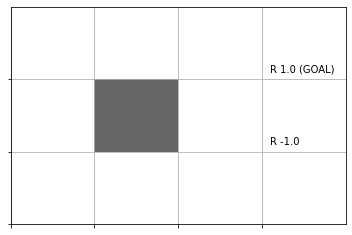

In [19]:
env = GridWorld()
env.render_v()

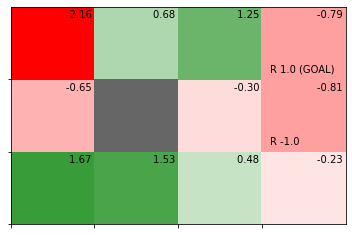

In [20]:
env = GridWorld()
V = {}
for state in env.states():
  # Dummy state value function
  V[state] = np.random.randn()
env.render_v(V)

### 4.2.2 How to use defaultdict

In [21]:
env = GridWorld()
V = {}

# Initialize dictionary elements
for state in env.states():
  V[state] = 0

state = (1, 2)
# Output value function for state (1, 2)
print(V[state])

0


In [22]:
from collections import defaultdict

env = GridWorld()
V = defaultdict(lambda: 0)

state = (1, 2)
print(V[state])

0


In [23]:
pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})

state = (0, 1)
print(pi[state])

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


### 4.2.3 Implementaion of Iterative Measure Evaluation

In [24]:
def eval_onestep(pi, V, env, gamma=0.9):
  # (1) Access to each state
  for state in env.states():
    # (2) The goal value function is always θ
    if state == env.goal_state:
      V[state] = 0
      continue
    
    # 'probs' stands for probabilities
    action_probs = pi[state]
    new_V = 0

    # (3) Access to each action
    for action, action_prob in action_probs.items():
      next_state = env.next_state(state, action)
      r = env.reward(state, action, next_state)
      # (4) New value function
      new_V += action_prob * (r + gamma * V[next_state])
    V[state] = new_V
  return V

In [25]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
  while True:
    # Vale function before update
    old_V = V.copy()
    V = eval_onestep(pi, V, env, gamma)

    # Find the maximum value of the updated quantity
    delta = 0
    for state in V.keys():
      t = abs(V[state] - old_V[state])
      if delta < t:
        delta = t
    
    # Comparison with threshold
    if delta < threshold:
      break
  return V

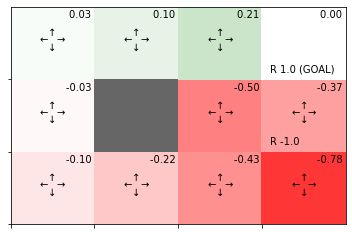

In [26]:
env = GridWorld()
gamma = 0.9

pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
V = defaultdict(lambda: 0)

V = policy_eval(pi, V, env, gamma)
env.render_v(V, pi)

## 4.4 Policy Iteration Implementation

### 4.4.1 Improvement of measures

In [27]:
def argmax(d):
  max_value = max(d.values())
  max_key = 0
  for key, value in d.items():
    if value == max_value:
      max_key = key
  return max_key

In [28]:
action_values = {0: 0.1, 1: -0.3, 2: 9.9, 3: -1.3}

max_action = argmax(action_values)
print(max_action)

2


In [29]:
def greedy_policy(V, env, gamma):
  pi = {}

  for state in env.states():
    action_values = {}

    for action in env.actions():
      next_state = env.next_state(state, action)
      r = env.reward(state, action, next_state)
      value = r + gamma * V[next_state]
      action_values[action] = value

      max_action = argmax(action_values)
      action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
      action_probs[max_action] = 1.0
      pi[state] = action_probs
  return pi

In [30]:
def policy_iter(env, gamma, threshold=0.001, is_render=True):
  pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
  V = defaultdict(lambda: 0)

  while True:
    # (1) evaluation
    V = policy_eval(pi, V, env, gamma, threshold)
    # (2) improvement
    new_pi = greedy_policy(V, env, gamma)

    if is_render:
      env.render_v(V, pi)
    
    # (3) Update Check
    if new_pi == pi:
      break
    pi = new_pi

  return pi

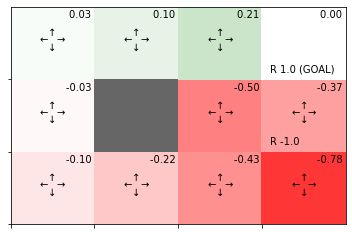

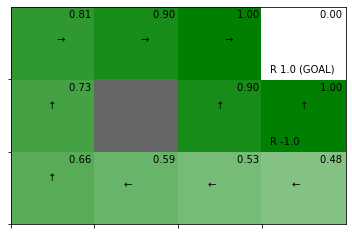

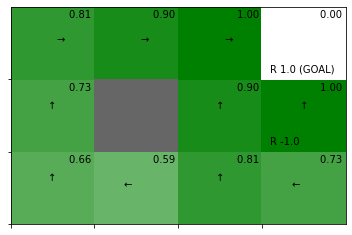

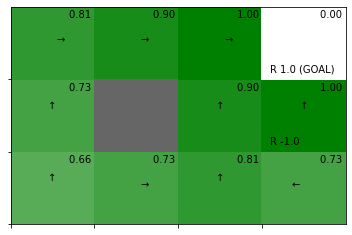

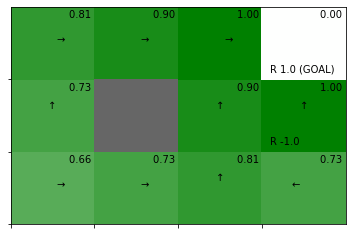

In [31]:
env = GridWorld()
gamma = 0.9
pi = policy_iter(env, gamma)

In [32]:
def value_iter_onestep(V, env, gamma):
    for state in env.states():
        if state == env.goal_state:
            V[state] = 0
            continue

        action_values = []
        for action in env.actions():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state]
            action_values.append(value)

        V[state] = max(action_values)
    return V

In [33]:
def value_iter(V, env, gamma, threshold=0.001, is_render=True):
    while True:
        if is_render:
            env.render_v(V)

        old_V = V.copy()
        V = value_iter_onestep(V, env, gamma)

        delta = 0
        for state in V.keys():
            t = abs(V[state] - old_V[state])
            if delta < t:
                delta = t

        if delta < threshold:
            break
    return V

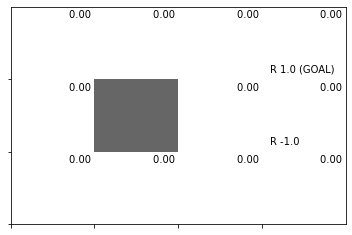

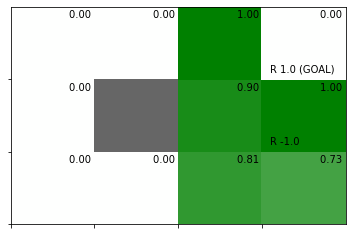

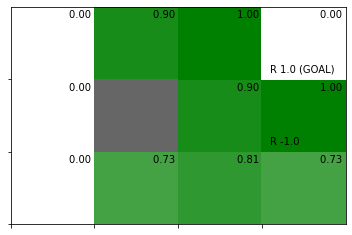

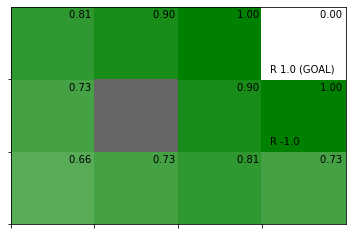

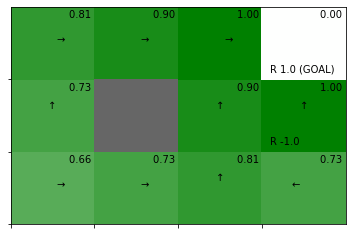

In [34]:
V = defaultdict(lambda: 0)
env = GridWorld()
gamma = 0.9

V = value_iter(V, env, gamma)

pi = greedy_policy(V, env, gamma)
env.render_v(V, pi)

# Chapter 5 Monte Carlo method

## 5.1 Basics of Monte Carlo Method

### 5.1.1 Sum of the dice

In [35]:
ps = {2: 1/36, 3: 2/36, 4: 3/36, 5: 4/36, 6: 5/36, 7: 6/36,
      8: 5/36, 9: 4/36, 10: 3/36, 11: 2/36, 12: 1/36}

V = 0
for x, p in ps.items():
  V += x*p
print(V)

6.999999999999999


In [36]:
import numpy as np

def sample(dices=2):
  x = 0
  for _ in range(dices):
    x += np.random.choice([1, 2, 3, 4, 5, 6])
  return x

In [37]:
print(sample())
print(sample())
print(sample())

6
6
12


### 5.1.3 Monte Carlo implementation

In [38]:
trial = 1000
samples = []
for _ in range(trial):
  s = sample()
  samples.append(s)

# find the mean
V = sum(samples) / len(samples)
print(V)

6.902


In [39]:
trial = 1000

samples = []
for _ in range(trial):
  s = sample()
  samples.append(s)
  # Calculate the average each time
  V = sum(samples) / len(samples)
  print(V)

6.0
5.5
6.0
6.75
6.6
6.5
6.571428571428571
6.25
6.222222222222222
6.2
6.636363636363637
6.833333333333333
6.769230769230769
6.857142857142857
6.733333333333333
6.6875
6.705882352941177
6.611111111111111
6.684210526315789
6.55
6.476190476190476
6.590909090909091
6.695652173913044
6.541666666666667
6.52
6.461538461538462
6.481481481481482
6.535714285714286
6.517241379310345
6.533333333333333
6.451612903225806
6.625
6.545454545454546
6.588235294117647
6.514285714285714
6.472222222222222
6.405405405405405
6.421052631578948
6.487179487179487
6.475
6.439024390243903
6.523809523809524
6.558139534883721
6.636363636363637
6.7555555555555555
6.804347826086956
6.702127659574468
6.75
6.73469387755102
6.78
6.686274509803922
6.653846153846154
6.660377358490566
6.592592592592593
6.672727272727273
6.678571428571429
6.719298245614035
6.706896551724138
6.661016949152542
6.7
6.737704918032787
6.741935483870968
6.761904761904762
6.765625
6.769230769230769
6.757575757575758
6.82089552238806
6.8529411764705

In [40]:
trial = 1000
V, n = 0, 0

for _ in range(trial):
  s = sample()
  n += 1
  V += (s - V) / n
  print(V)

10.0
10.5
9.0
8.25
8.0
7.166666666666667
7.142857142857143
7.375
7.333333333333333
7.5
7.7272727272727275
8.083333333333334
7.923076923076923
8.0
8.066666666666666
8.1875
8.235294117647058
8.055555555555555
7.894736842105263
7.75
7.571428571428571
7.636363636363636
7.565217391304348
7.75
7.68
7.615384615384615
7.444444444444444
7.428571428571428
7.275862068965517
7.266666666666667
7.161290322580645
7.3125
7.303030303030303
7.1764705882352935
7.257142857142856
7.277777777777777
7.189189189189189
7.1842105263157885
7.076923076923076
7.049999999999999
6.999999999999999
7.047619047619047
7.046511627906976
6.999999999999999
7.022222222222221
7.086956521739129
7.170212765957445
7.166666666666665
7.20408163265306
7.139999999999999
7.098039215686273
7.076923076923076
7.132075471698112
7.185185185185184
7.181818181818181
7.232142857142856
7.298245614035086
7.3103448275862055
7.237288135593219
7.233333333333332
7.278688524590162
7.274193548387095
7.333333333333332
7.312499999999999
7.35384615384

## 5.3 Monte Carlo implementation

### 5.3.1 step method

In [41]:
env = GridWorld()
# Action of dummy
action = 0
next_state, reward, done = env.step(action)

print('next_state:', next_state)
print('reward:', reward)
print('done:', done)

next_state: (1, 0)
reward: 0
done: False


In [42]:
env = GridWorld()
state = env.reset()

### 5.3.2 Agent class implementation

In [47]:
class RandomAgent:
    def __init__(self):
        self.gamma = 0.9
        self.action_size = 4

        random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.V = defaultdict(lambda: 0)
        self.cnts = defaultdict(lambda: 0)
        self.memory = []

    def get_action(self, state):
        action_probs = self.pi[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
        data = (state, action, reward)
        self.memory.append(data)

    def reset(self):
        self.memory.clear()

    def eval(self):
        G = 0
        for data in reversed(self.memory):
            state, action, reward = data
            G = self.gamma * G + reward
            self.cnts[state] += 1
            self.V[state] += (G - self.V[state]) / self.cnts[state]

### 5.3.3 Running the Monte Carlo method

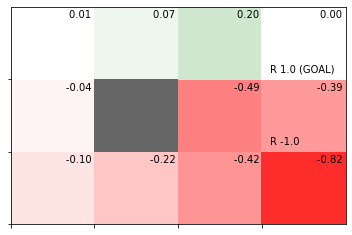

In [48]:
env = GridWorld()
agent = RandomAgent()

episodes = 1000
for episode in range(episodes):
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.add(state, action, reward)
        if done:
            agent.eval()
            break

        state = next_state

env.render_v(agent.V)

## 5.4 Policy Control with Monte Carlo Method

### 5.4.2 Implementation of policy control using Monte Carlo methods

In [60]:
class McAgent:
  def __init__(self):
    self.gamma = 0.9
    self.action_size = 4

    random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
    self.pi = defaultdict(lambda: random_actions)
    # Use Q instead of V
    self.Q = defaultdict(lambda: 0)
    self.cnts = defaultdict(lambda: 0)
    self.memory = []

    def get_action(self, state):
      action_probs = self.pi[state]
      actions = list(action_probs.keys())
      probs = list(action_probs.values())
      return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
      data = (state, action, reward)
      self.memory.append(data)
    
    def reset(self):
      self.memory.clear()

    def update(self):
      G = 0
      for data in reversed(self.memory):
        state, action, reward = data
        G = self.gamma * G + reward
        key = (state, action)
        self.cnts[key] += 1
        self.Q[key] += (G - self.Q[key]) / self.cnts[key]

        self.pi[state] = greedy_probs(self.Q, state)

In [61]:
def greedy_probs(Q, state, action_size=4):
  qs = [Q[(state, action)] for action in range(action_size)]
  max_action = np.argmax(qs)

  action_probs = {action: 0.0 for action in range(action_size)}
  # At this point, action_probs is {0:0.0, 1:0.0, 2:0.0, 3:0.0}
  action_probs[max_action] = 1
  return action_probs

### 5.4.3 ε-greedy method (1st modification)

In [62]:
def greedy_probs(Q, state, epsilon=0, action_size=4):
  qs = [Q[(state, action)] for action in range(action_size)]
  max_action = np.argmax(qs)

  base_prob = epsilon / action_size
  action_probs = {action: base_prob for action in range(action_size)}
  # At this point, action_probs is {0: ε/4, 1: ε/4, 2: ε/4, 3: ε/4}
  action_probs[max_action] += (1 - epsilon)
  return action_probs

### 5.4.4 To fixed value alpha method (second modification)

In [63]:
class McAgent:
  def __init__(self):
    self.gamma = 0.9
    self.action_size = 4

    random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
    self.pi = defaultdict(lambda: random_actions)
    # Use Q instead of V
    self.Q = defaultdict(lambda: 0)
    self.cnts = defaultdict(lambda: 0)
    self.memory = []

    def get_action(self, state):
      action_probs = self.pi[state]
      actions = list(action_probs.keys())
      probs = list(action_probs.values())
      return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
      data = (state, action, reward)
      self.memory.append(data)

    def update(self):
      G = 0
      for data in reversed(self.memory):
        state, action, reward = data
        G = self.gamma * G + reward
        key = (state, action)
        self.cnts[key] += 1
        # Before modification
        # self.Q[key] += (G - self.Q[key]) / self.cnts[key]

        # After modification
        alpha = 0.1
        self.Q[key] += (G - self.Q[key]) * alpha

        self.pi[state] = greedy_probs(self.Q, state)

### 5.4.5 [Corrected] Implementation of Iterative Policies Using Monte Carlo Methods

In [67]:
class McAgent:
    def __init__(self):
        self.gamma = 0.9
        self.epsilon = 0.1
        self.alpha = 0.1
        self.action_size = 4

        random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.Q = defaultdict(lambda: 0)
        self.memory = []

    def get_action(self, state):
        action_probs = self.pi[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
        data = (state, action, reward)
        self.memory.append(data)

    def reset(self):
        self.memory.clear()

    def update(self):
        G = 0
        for data in reversed(self.memory):
            state, action, reward = data
            G = self.gamma * G + reward
            key = (state, action)
            self.Q[key] += (G - self.Q[key]) * self.alpha
            self.pi[state] = greedy_probs(self.Q, state, self.epsilon)

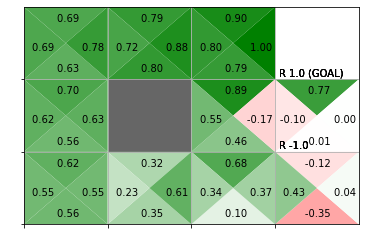

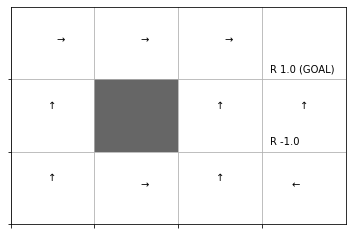

In [68]:
env = GridWorld()
agent = McAgent()

episodes = 10000
for episode in range(episodes):
  state = env.reset()
  agent.reset()

  while True:
    action = agent.get_action(state)
    next_state, reward, done = env.step(action)

    agent.add(state, action, reward)
    if done:
      agent.update()
      break
    
    state = next_state

env.render_q(agent.Q)

## 5.5 Off-Policy and Importance Sampling

### 5.5.2 Importance Sampling

In [69]:
import numpy as np

x = np.array([1, 2, 3])
pi = np.array([0.1, 0.1, 0.8])

# expectation
e = np.sum(x * pi)
print('E_pi[x]', e)

# Monte Carlo Method
n = 100
samples = []
for _ in range(n):
  # Sampling with pi
  s = np.random.choice(x, p=pi)
  samples.append(s)

mean = np.mean(samples)
var = np.var(samples)
print('MC: {:.2f} (var: {:.2f})'.format(mean, var))

E_pi[x] 2.7
MC: 2.74 (var: 0.35)


In [71]:
b = np.array([1/3, 1/3, 1/3])
n = 100
samples = []

for _ in range(n):
  # [0, 1, 2]
  idx = np.arange(len(b))
  # Sampling with b
  i = np.random.choice(idx, p=b)
  s = x[i]
  rho = pi[i] / b[i]
  samples.append(rho * s)

mean = np.mean(samples)
var = np.var(samples)
print('IS: {:.2f} (var: {:.2f})'.format(mean, var))

IS: 2.68 (var: 10.10)


### 5.5.3 To reduce the variance

In [72]:
# Change probability distribution
b = np.array([0.2, 0.2, 0.6])
n = 100
samples = []

for _ in range(n):
  # [0, 1, 2]
  idx = np.arange(len(b))
  i = np.random.choice(idx, p=b)
  s = x[i]
  rho = pi[i] / b[i]
  samples.append(rho * s)

mean = np.mean(samples)
var = np.var(samples)
print('IS: {:.2f} (var: {:.2f})'.format(mean, var))

IS: 2.80 (var: 2.48)
